<a href="https://colab.research.google.com/github/hojoooon/PDM16/blob/main/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20210927', periods=6)
dates

DatetimeIndex(['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# head()
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-09-27,0.188258,-2.494472,-0.580238,-0.397435
2021-09-28,0.643995,-0.144609,1.568640,-0.687159
2021-09-29,1.170298,0.118248,0.085681,-2.249762
2021-09-30,0.020805,-0.776191,-0.049315,1.831673
2021-10-01,-0.489568,-1.634693,0.774910,-1.813893
2021-10-02,-0.316090,-0.499003,-0.364869,-0.225673




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


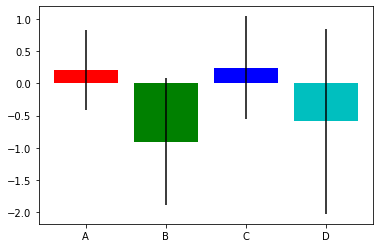

In [5]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()

***

## pandas의 데이터 시각화 (Visualization)

In [6]:
df  # 6일 동안의 4개의 항목을 가진 데이터 프레임

,A,B,C,D
2021-09-27,0.188258,-2.494472,-0.580238,-0.397435
2021-09-28,0.643995,-0.144609,1.568640,-0.687159
2021-09-29,1.170298,0.118248,0.085681,-2.249762
2021-09-30,0.020805,-0.776191,-0.049315,1.831673
2021-10-01,-0.489568,-1.634693,0.774910,-1.813893
2021-10-02,-0.316090,-0.499003,-0.364869,-0.225673


### 꺽은선 그래프

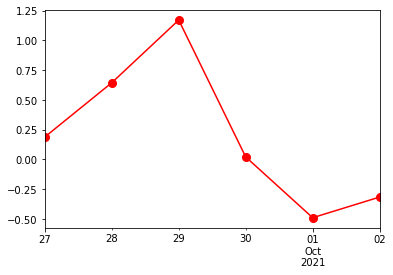

In [7]:
df['A'].plot(marker='o', c='r', ms=8)

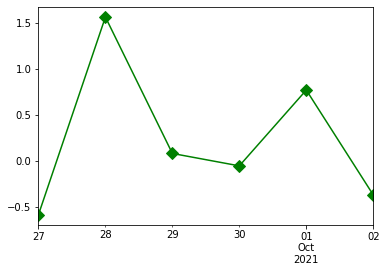

In [8]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize

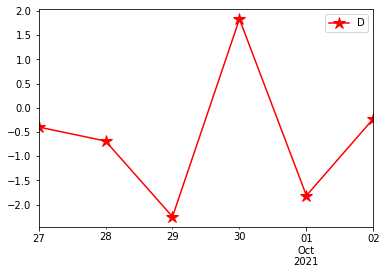

In [9]:
df.plot(y='D', marker='*', c='r', ms=12)   # x-축은 날짜인덱스

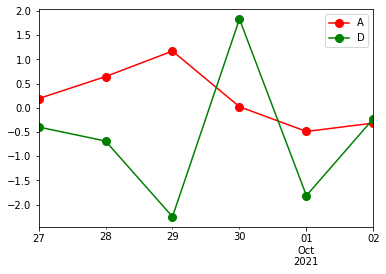

In [10]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8)   # KeyError: ('A', 'D') 
df[['A','D']].plot(marker='o', color='rg', ms=8)  # works!, change colors

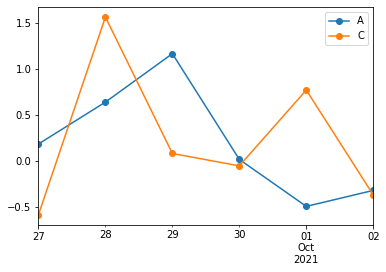

In [11]:
df.plot(y=['A','C'], marker='o')

### 산포도 (Scatter graph)

In [12]:
df

,A,B,C,D
2021-09-27,0.188258,-2.494472,-0.580238,-0.397435
2021-09-28,0.643995,-0.144609,1.568640,-0.687159
2021-09-29,1.170298,0.118248,0.085681,-2.249762
2021-09-30,0.020805,-0.776191,-0.049315,1.831673
2021-10-01,-0.489568,-1.634693,0.774910,-1.813893
2021-10-02,-0.316090,-0.499003,-0.364869,-0.225673


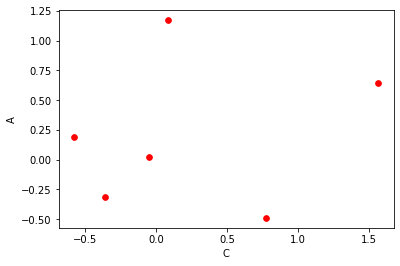

In [13]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32)  

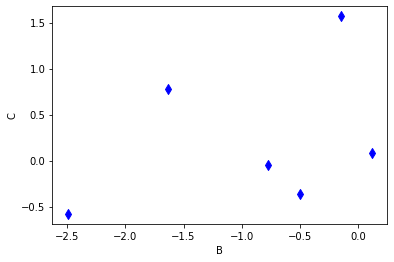

In [14]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

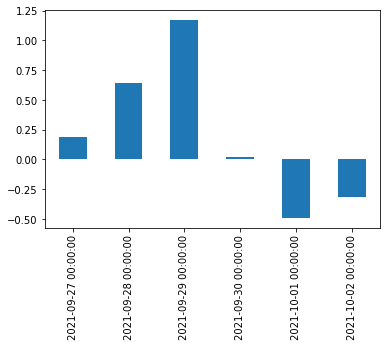

In [15]:
df['A'].plot.bar()

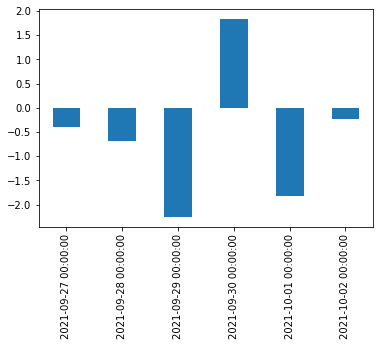

In [16]:
df['D'].plot.bar()

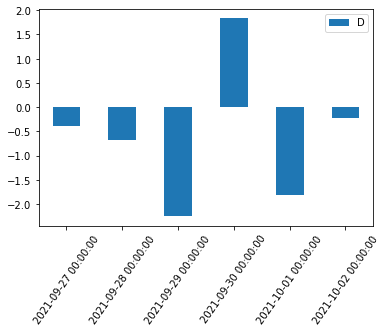

In [17]:
df.plot(kind='bar', y='D', rot=55)

#### 다중 바그래프

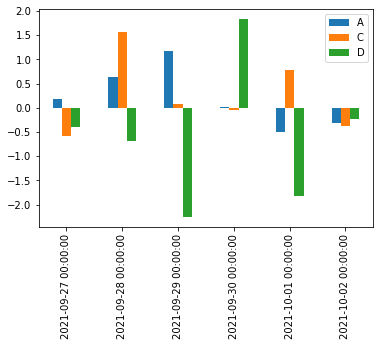

In [18]:
df.plot(kind='bar',y=['A','C','D'])

#### 평균/표준편차 그래프

In [19]:
df.mean(0), df.std(0), df.columns

(A    0.202950
 B   -0.905120
 C    0.239135
 D   -0.590375
 dtype: float64, A    0.618492
 B    0.986461
 C    0.799698
 D    1.435025
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

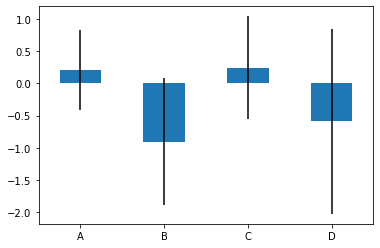

In [20]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0)   # yerr --> 표준편차, rot=0 --> x축 A,B,C,D 방향



---



### 그래프 이어 그리기

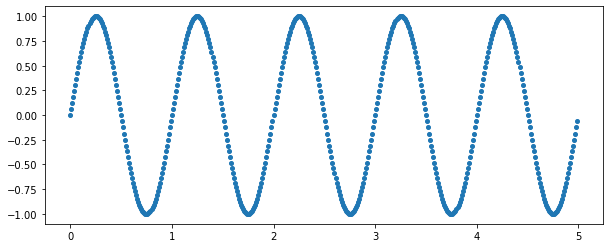

In [21]:
x1 = np.arange(0.0, 5.0, 0.01)
y1 = np.sin(2*np.pi*x1)
plt.figure(figsize=(10,4)) # 가로 10, 세로 4
plt.plot(x1, y1, 'o', ms = 4)

In [22]:
x1.shape, y1.shape  # x1, y1 데이터 개수가 같음

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [23]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [24]:
df.tail()

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [25]:
len(df)

500

In [26]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)] # ML train data, test data 설정
print(len(pre), len(post))

400 100


In [27]:
post.shape # test data 20%

(100, 1)

In [28]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)

In [29]:
len(pre),len(post)

(400, 100)

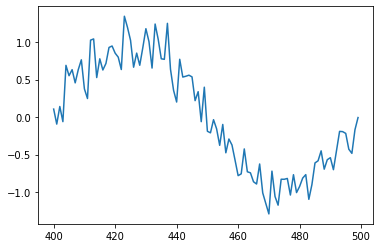

In [37]:
plt.plot(np.arange(len(pre), len(pre) + len(post)),post2)

In [31]:
pre

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690
...,...
3.95,-0.309017
3.96,-0.248690
3.97,-0.187381
3.98,-0.125333


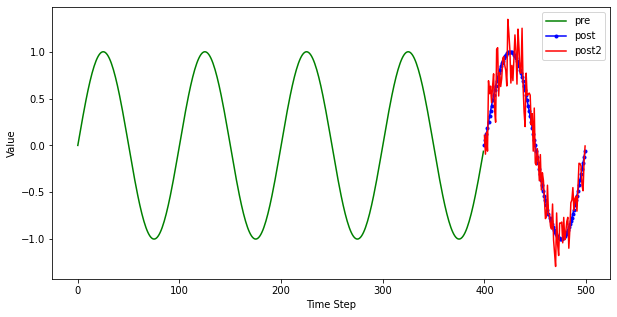

In [38]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre") 
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용

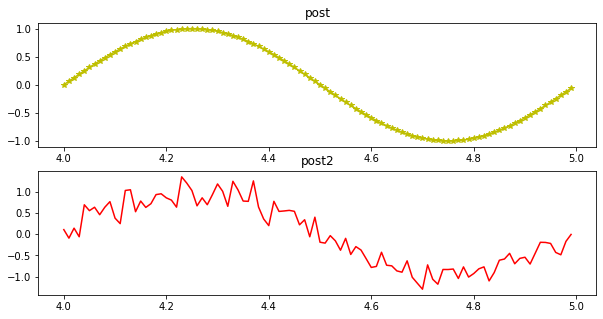

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1).set_title("post")
plt.plot(post, 'y', marker='*')

plt.subplot(2,1,2).set_title("post2")
plt.plot(post2, c ='r')

plt.show()

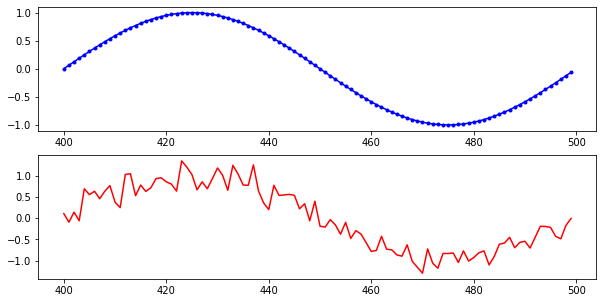

In [34]:
fig = plt.figure(figsize=(10,5))
p1 = fig.add_subplot(2,1,1)
p2 = fig.add_subplot(2,1,2)
p1.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.')
p2.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r')

plt.show()

- subplots 사용 



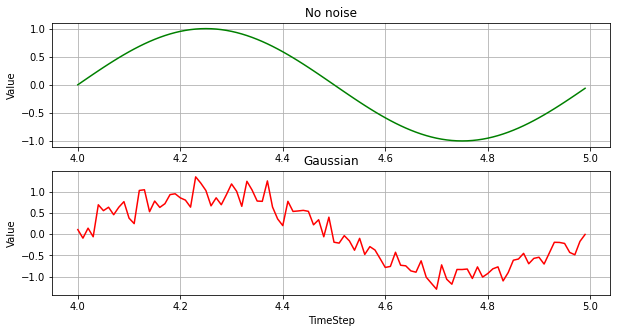

In [35]:
fig, ax = plt.subplots(2,1, figsize=(10,5))

ax[0].plot(post, c='g')
ax[0].set_ylabel('Value')
ax[0].set_title('No noise')
ax[0].grid()

ax[1].plot(post2, c ='r')
ax[1].set_xlabel('TimeStep')
ax[1].set_ylabel('Value')
ax[1].set_title('Gaussian')
ax[1].grid()

plt.show()

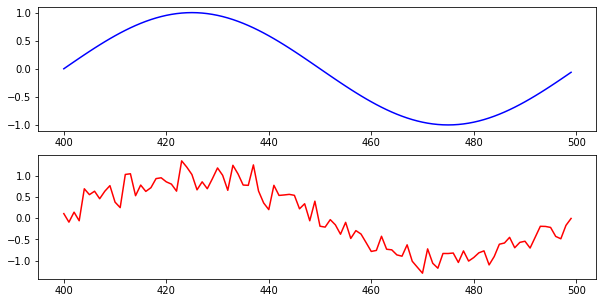

In [36]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(np.arange(len(pre), len(pre) + len(post)), post, c='b')
ax[1].plot(np.arange(len(pre), len(pre) + len(post)), post2, c='r')

plt.show()